In [20]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

#read in speeches
df = pd.read_csv('speeches.csv')

# Sentiment analysis pipeline
nlp = pipeline(task='text-classification', model='nickwong64/bert-base-uncased-finance-sentiment')

# Define a function to apply sentiment analysis to each speech
def analyze_sentiment(speech):
    # Limit the maximum length of the input sequence to avoid errors
    max_length = 512 
    truncated_text = speech[:max_length]
    
    result = nlp(truncated_text)
    return result[0]['label'], result[0]['score']

# Apply sentiment analysis to the "speech" column and create new columns for sentiment label and score
df[['sentiment_label', 'score']] = df['speech'].apply(analyze_sentiment).apply(pd.Series)

# Display the DataFrame with sentiment information
print(df)




     year                                             header  \
0    2023                  Remarks by OPEC Secretary General   
1    2023                  Address by OPEC Secretary General   
2    2023                  Address by OPEC Secretary General   
3    2022  OPEC Statement to the UN Climate Change Confer...   
4    2022          Keynote address by OPEC Secretary General   
..    ...                                                ...   
332  2003       Challenges to OPEC in the Medium & Long Term   
333  2003  Cooperation between producers & consumers: an ...   
334  2003  Short- and long-term oil price trends in the a...   
335  2003  Statement by OPEC Secretary General to the Ara...   
336  2003               The Role of OPEC in the 21st Century   

                                           information  \
0    Delivered by HE Haitham Al Ghais, OPEC Secreta...   
1    Delivered by HE Haitham Al Ghais, OPEC Secreta...   
2    Delivered by HE Haitham Al Ghais, OPEC Secreta...   

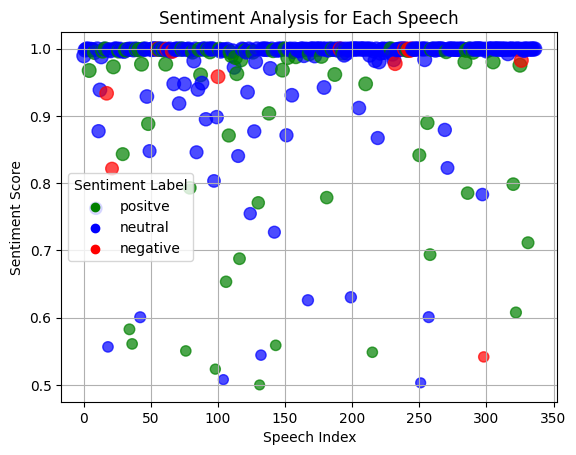

In [21]:
#plot the results

colors = {'positve': 'green', 'neutral': 'blue', 'negative': 'red'}

# Use a default color (gray) for values not recognized in 'colors'
df['color'] = df['sentiment_label'].map(lambda x: colors.get(x, 'gray'))

# Size the points based on the sentiment score
sizes = df['score'] * 100  # You can adjust the multiplier to scale the size

# Scatter plot with color-coded labels and legend
for label, color in colors.items():
    plt.scatter([], [], color=color, label=label)

plt.scatter(df.index, df['score'], c=df['color'], s=sizes, marker='o', alpha=0.7)
plt.title('Sentiment Analysis for Each Speech')
plt.xlabel('Speech Index')
plt.ylabel('Sentiment Score')
plt.legend(title='Sentiment Label')
plt.grid(True)
plt.show()

In [22]:
# Save the plot as an image
plt.savefig('pretrained_sentiment.png')

<Figure size 640x480 with 0 Axes>

In [18]:
negative_speeches = df[df['sentiment_label'] == 'negative']

# count negative speeches
len(negative_speeches[['speech', 'score']])

14